In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

sns.set_style('whitegrid')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

C:\Users\aidan\Anaconda3\envs\DSI-6\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [71]:
industries = ['construction', 'education_health_services', 'financial_activities', 'information', 
              'leisure_hospitality', 'manufacturing', 'natural_resources_mining', 'other_services', 
              'professional_business_services', 'trade_transportation_utilities']

## Arguements
__csv_file_path:__ *TYPE = STRING*, local file path for csv file to be imported as pandas dataframe to be used for modeling  

__period_of_disaster:__ *TYPE = INT*, the indexed period that the disaster occurred in, 0 based indexing with 12 periods per year  

__industry_disaster_name:__ *TYPE = STRING*, descriptive name to be used to label the csv and png files exported to current folder  

In [63]:
def sarima_search(csv_file_path, period_of_disaster, industry_disaster_name):
    
    import pandas as pd
    import numpy as np
    from datetime import datetime
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics import mean_squared_error
    from statsmodels.tsa.arima_model import ARIMA
    from statsmodels.tsa.statespace.sarimax import SARIMAX

    sns.set_style('whitegrid')

    %matplotlib inline
    %config InlineBackend.figure_format = 'retina'
    
    
    industry_employment = pd.read_csv(csv_file_path, header=None, names=['date', 'employment'])

    industry_employment.index = pd.DatetimeIndex(start=industry_employment['date'][0], periods=len(industry_employment['date']), freq = 'M')

    industry_employment.drop(columns='date', inplace=True)

    train = industry_employment.iloc[0:period_of_disaster]

    test = industry_employment.iloc[period_of_disaster:]


    mse = 99 * (10 ** 16)
    final_p = 0
    final_d = 0
    final_q = 0

    final_P = 0
    final_D = 0
    final_Q = 0

    for p in range(4):
        for q in range(4):
            for d in range(4):
                for P in range(4):
                    for Q in range(4):
                        for D in range(4):
                            try:
                                sarima = SARIMAX(endog = train['employment'],
                                                 order = (p, d, q),              # (p, d, q)
                                                 seasonal_order = (P, D, Q, 12)) # (P, D, Q, S)

                                model = sarima.fit()

                                preds = model.predict(start = 0, end = (period_of_disaster - 1))

                                if mse > mean_squared_error(train['employment'], preds):
                                    mse = mean_squared_error(train['employment'], preds)
                                    final_q = q
                                    final_d = d
                                    final_q = q

                                    final_P = P
                                    final_D = D
                                    final_Q = Q

                            except:
                                pass

    print(f'Our model that minimizes MSE on the training data is the SARIMA({final_p}, {final_d}, {final_q})x({final_P},{final_D},{final_Q},12).')
    print(f'This model has an MSE of {mse}.')
    
    return final_p, final_d, final_q, final_P, final_D, final_Q

In [230]:
def sarima_model(p, d, q, P, D, Q, csv_file_path, period_of_disaster, industry_disaster_name):
    
    import pandas as pd
    import numpy as np
    from datetime import datetime
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics import mean_squared_error
    from statsmodels.tsa.arima_model import ARIMA
    from statsmodels.tsa.statespace.sarimax import SARIMAX

    sns.set_style('whitegrid')

    %matplotlib inline
    %config InlineBackend.figure_format = 'retina'
    
    
    industry_employment = pd.read_csv(csv_file_path, header=None, names=['date', 'employment'])

    industry_employment.index = pd.DatetimeIndex(start=industry_employment['date'][0], periods=len(industry_employment['date']), freq = 'M')

    industry_employment.drop(columns='date', inplace=True)

    train = industry_employment.iloc[0:period_of_disaster]

    test = industry_employment.iloc[period_of_disaster:]
    
    
    sarima = SARIMAX(endog = train['employment'], 
                     order = (p, d, q), 
                     seasonal_order = (P, D, Q, 12))

    model = sarima.fit()

    preds = model.predict(start= period_of_disaster, end=48)


    plt.figure(figsize=(10,6))
    plt.plot(train['employment'], color = 'blue')
    plt.plot(test['employment'], color = 'orange')
    plt.plot(preds, color = 'green')
    plt.title(label = industry_disaster_name, fontsize=18)
    plt.savefig('./sandy_datasets_and_visuals/' + industry_disaster_name + '.png')
    plt.show();

    industry_employment['preds'] = preds
    industry_employment['residual'] = industry_employment['preds'] - industry_employment['employment']
    
    industry_employment.to_csv('./sandy_datasets_and_visuals/' + industry_disaster_name + '.csv')
    
    return industry_employment, train, test

## Construction

C:\Users\aidan\Anaconda3\envs\DSI-6\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\aidan\Anaconda3\envs\DSI-6\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\aidan\Anaconda3\envs\DSI-6\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\aidan\Anaconda3\envs\DSI-6\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\aidan\Anaconda3\envs\DSI-6\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood opti

Our model that minimizes MSE on the training data is the SARIMA(0, 1, 1)x(1,0,0,12).
This model has an MSE of 334359163.56332767.


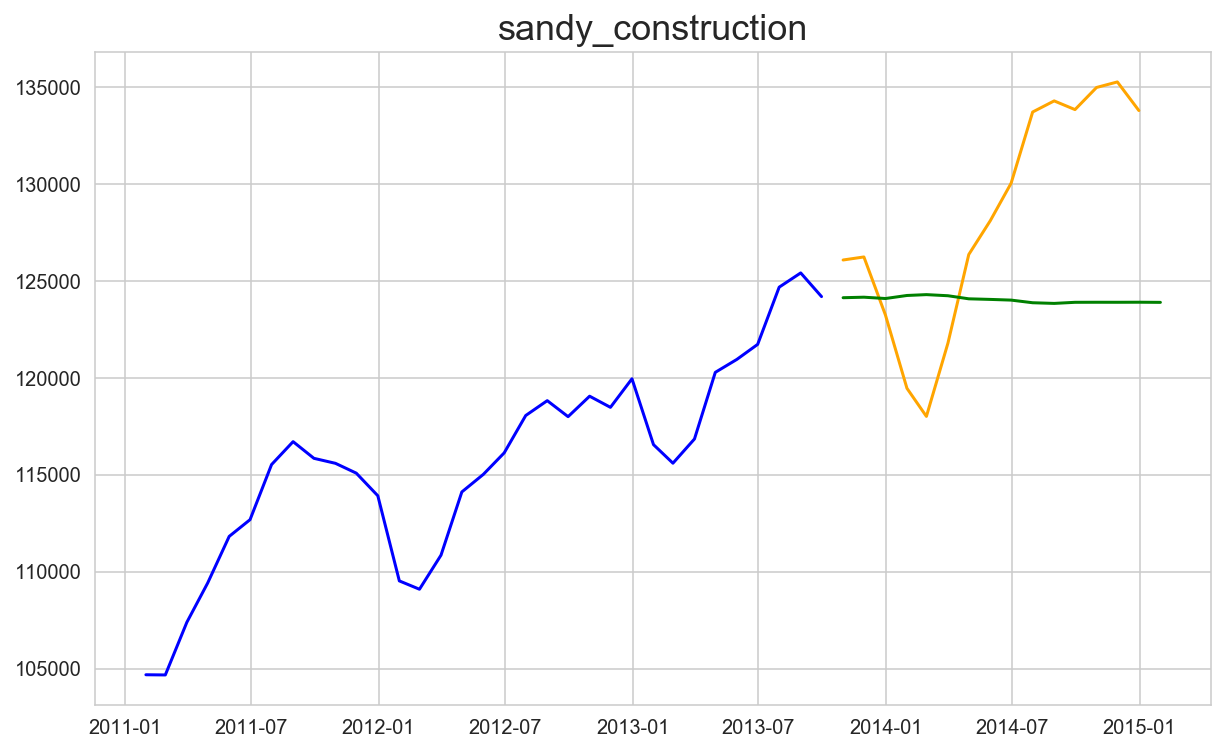

,employment,preds,residual
2011-01-31,104683,NaN,NaN
2011-02-28,104673,NaN,NaN
2011-03-31,107391,NaN,NaN
2011-04-30,109419,NaN,NaN
2011-05-31,111825,NaN,NaN
2011-06-30,112688,NaN,NaN
2011-07-31,115532,NaN,NaN
2011-08-31,116715,NaN,NaN
2011-09-30,115854,NaN,NaN
2011-10-31,115596,NaN,NaN


In [28]:
sarima_search(csv_file_path='./DisastersbyIndustry/Sandy-Industry/construction_all_employees.csv', period_of_disaster=33, industry_disaster_name='sandy_construction')

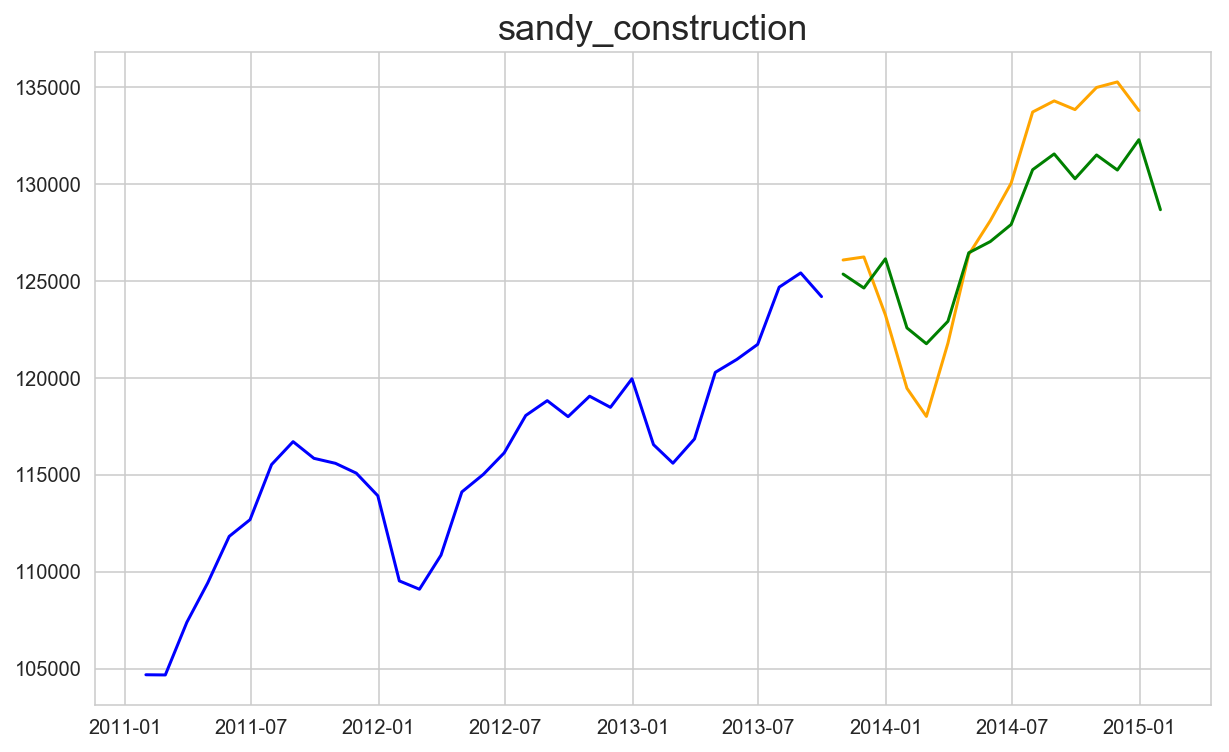

In [240]:
cons, train, test = sarima_model(1, 1, 1, 1, 1, 0, csv_file_path='./DisastersbyIndustry/Sandy-Industry/construction_all_employees.csv', period_of_disaster=33, industry_disaster_name='sandy_construction')

## Education and Health Services

In [73]:
p, d, q, P, D, Q = sarima_search(csv_file_path='./DisastersbyIndustry/Sandy-Industry/education_health_services_all_employees.csv', period_of_disaster=33, industry_disaster_name='sandy_edu_health_services')

C:\Users\aidan\Anaconda3\envs\DSI-6\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
C:\Users\aidan\Anaconda3\envs\DSI-6\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:937: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:]**2).mean()
C:\Users\aidan\Anaconda3\envs\DSI-6\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\aidan\Anaconda3\envs\DSI-6\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Conve

Our model that minimizes MSE on the training data is the SARIMA(0, 1, 3)x(2,0,0,12).
This model has an MSE of 17084809258.510742.


In [76]:
print(p,d,q,P,D,Q)

0 1 3 2 0 0


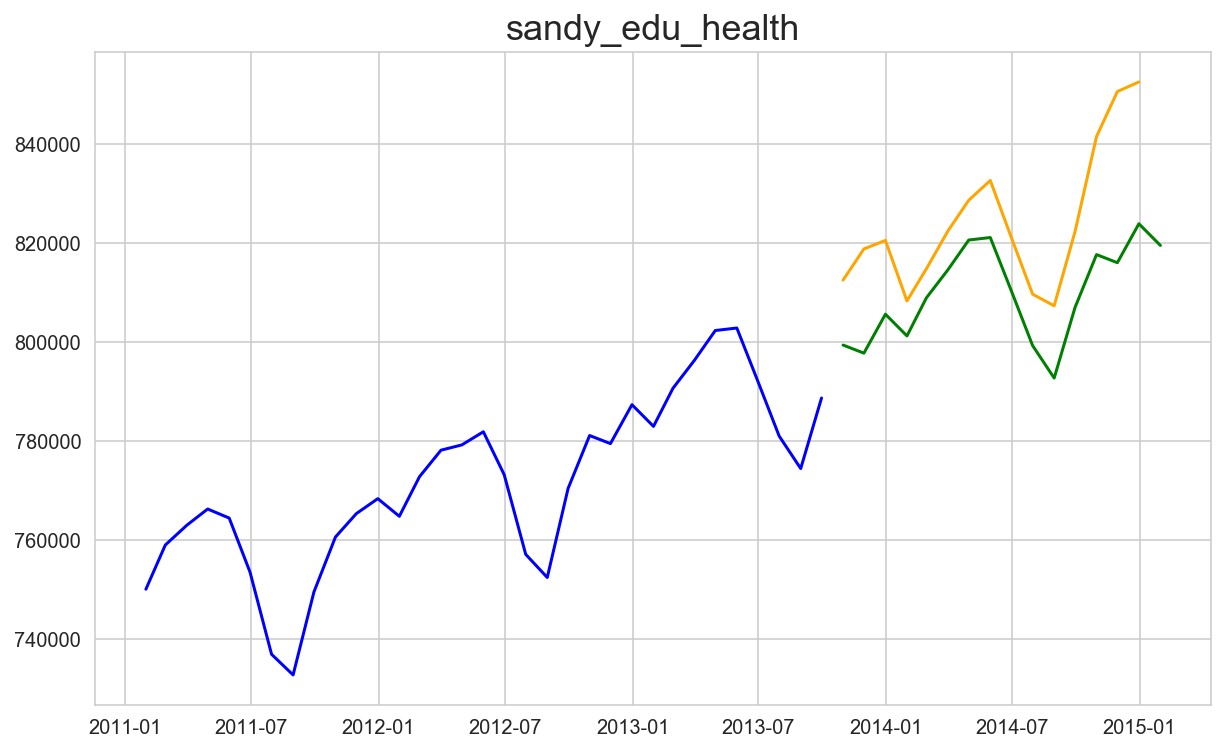

In [241]:
edu_health, train, test = sarima_model(1,1,1,1,1,0, csv_file_path='./DisastersbyIndustry/Sandy-Industry/education_health_services_all_employees.csv', period_of_disaster=33, industry_disaster_name='sandy_edu_health')

## Financial Activities

In [120]:
sarima_search(p, d, q, P, D, Q = sarima_search(csv_file_path='./DisastersbyIndustry/Sandy-Industry/financial_activities_all_employees.csv', period_of_disaster=33, industry_disaster_name='sandy_financial_activities'))

C:\Users\aidan\Anaconda3\envs\DSI-6\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
C:\Users\aidan\Anaconda3\envs\DSI-6\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\aidan\Anaconda3\envs\DSI-6\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:937: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:]**2).mean()
C:\Users\aidan\Anaconda3\envs\DSI-6\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type

C:\Users\aidan\Anaconda3\envs\DSI-6\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\aidan\Anaconda3\envs\DSI-6\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\aidan\Anaconda3\envs\DSI-6\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\aidan\Anaconda3\envs\DSI-6\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\aidan\Anaconda3\envs\DSI-6\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood opti

Our model that minimizes MSE on the training data is the SARIMA(0, 0, 3)x(1,0,0,12).
This model has an MSE of 6523113553.8719425.


C:\Users\aidan\Anaconda3\envs\DSI-6\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


TypeError: sarima_search() got an unexpected keyword argument 'Q'

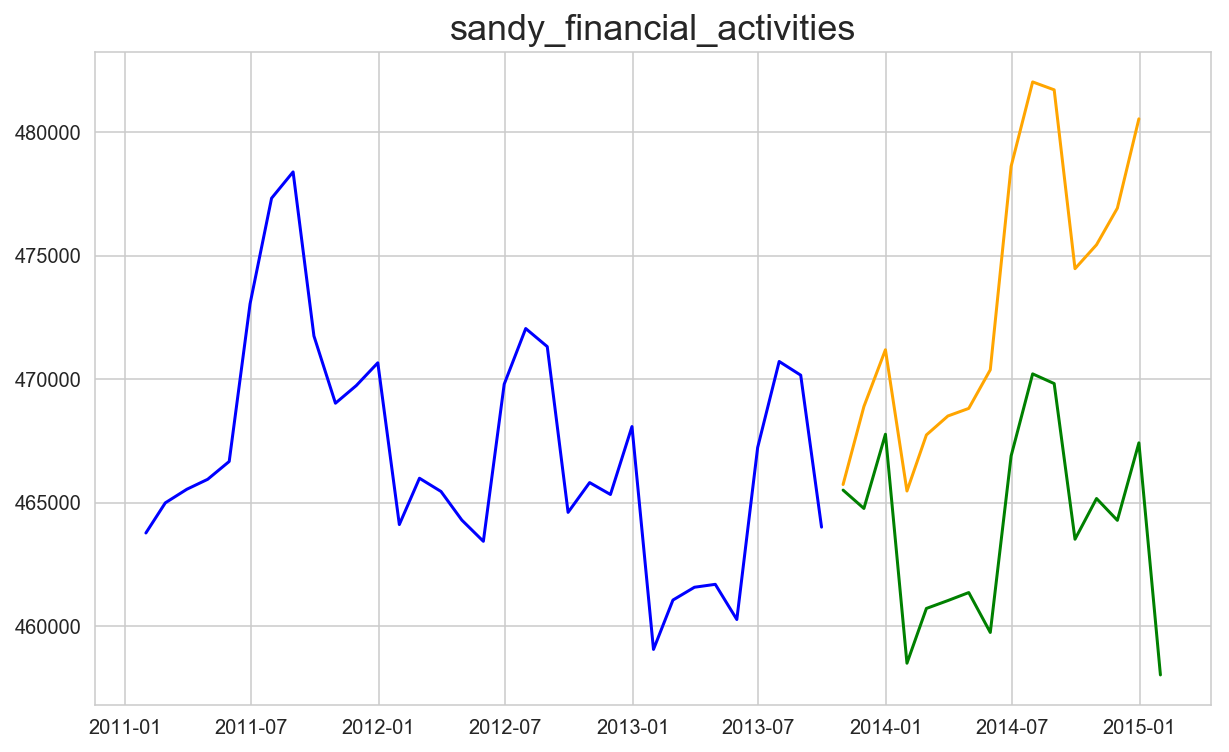

In [242]:
finance, train, test = sarima_model(1,1,2,1,1,0,csv_file_path='./DisastersbyIndustry/Sandy-Industry/financial_activities_all_employees.csv', period_of_disaster=33, industry_disaster_name='sandy_financial_activities')

## Information

In [142]:
p, d, q, P, D, Q = sarima_search(csv_file_path='./DisastersbyIndustry/Sandy-Industry/information_all_employees.csv', period_of_disaster=33, industry_disaster_name='sandy_information')

C:\Users\aidan\Anaconda3\envs\DSI-6\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
C:\Users\aidan\Anaconda3\envs\DSI-6\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:937: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:]**2).mean()
C:\Users\aidan\Anaconda3\envs\DSI-6\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\aidan\Anaconda3\envs\DSI-6\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Conve

C:\Users\aidan\Anaconda3\envs\DSI-6\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\aidan\Anaconda3\envs\DSI-6\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\aidan\Anaconda3\envs\DSI-6\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\aidan\Anaconda3\envs\DSI-6\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\aidan\Anaconda3\envs\DSI-6\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood opti

Our model that minimizes MSE on the training data is the SARIMA(0, 1, 3)x(2,0,0,12).
This model has an MSE of 791935357.4491347.


C:\Users\aidan\Anaconda3\envs\DSI-6\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\aidan\Anaconda3\envs\DSI-6\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


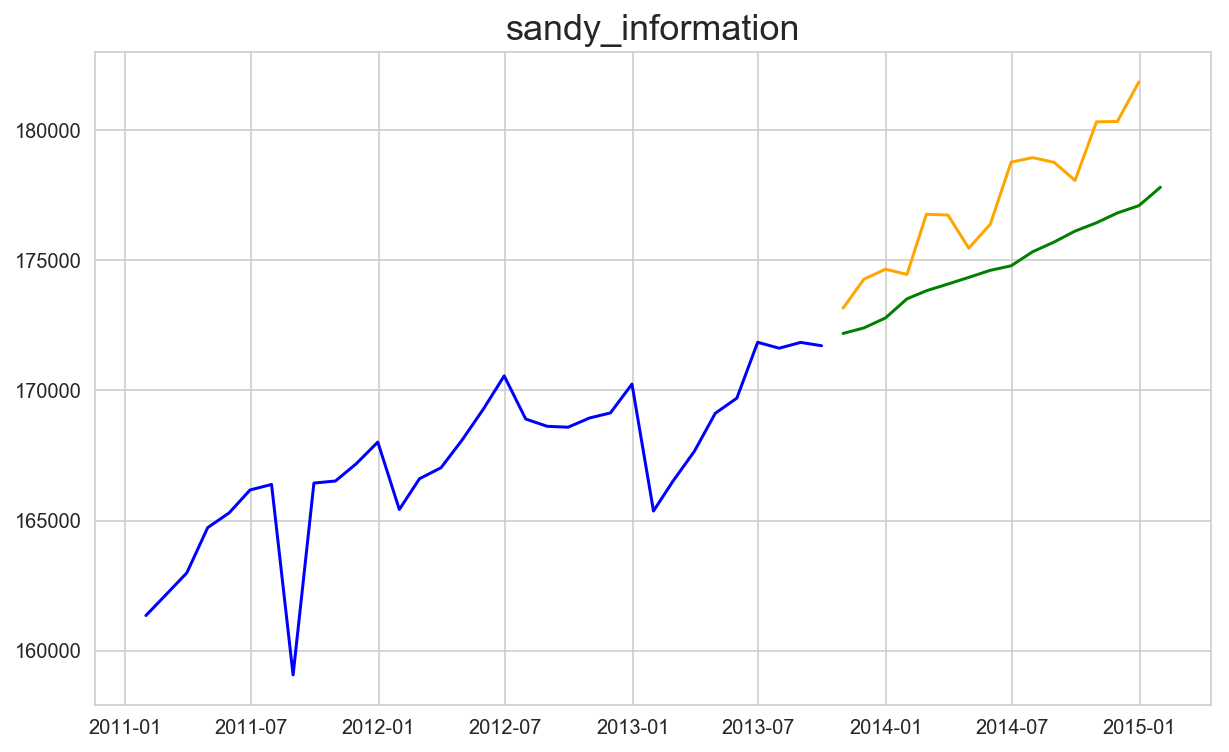

In [243]:
info, train, test = sarima_model(2,2,3,2,0,0, csv_file_path='./DisastersbyIndustry/Sandy-Industry/information_all_employees.csv', period_of_disaster=33, industry_disaster_name='sandy_information')

## Leisure Hospitality

In [207]:
sarima_search(csv_file_path='./DisastersbyIndustry/Sandy-Industry/leisure_hospitality_all_employees.csv', period_of_disaster=33, industry_disaster_name='sandy_leisure_hosp')

C:\Users\aidan\Anaconda3\envs\DSI-6\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
C:\Users\aidan\Anaconda3\envs\DSI-6\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:937: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:]**2).mean()
C:\Users\aidan\Anaconda3\envs\DSI-6\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\aidan\Anaconda3\envs\DSI-6\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Conve

Our model that minimizes MSE on the training data is the SARIMA(0, 1, 3)x(1,0,0,12).
This model has an MSE of 3362331018.069896.


(0, 1, 3, 1, 0, 0)

C:\Users\aidan\Anaconda3\envs\DSI-6\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


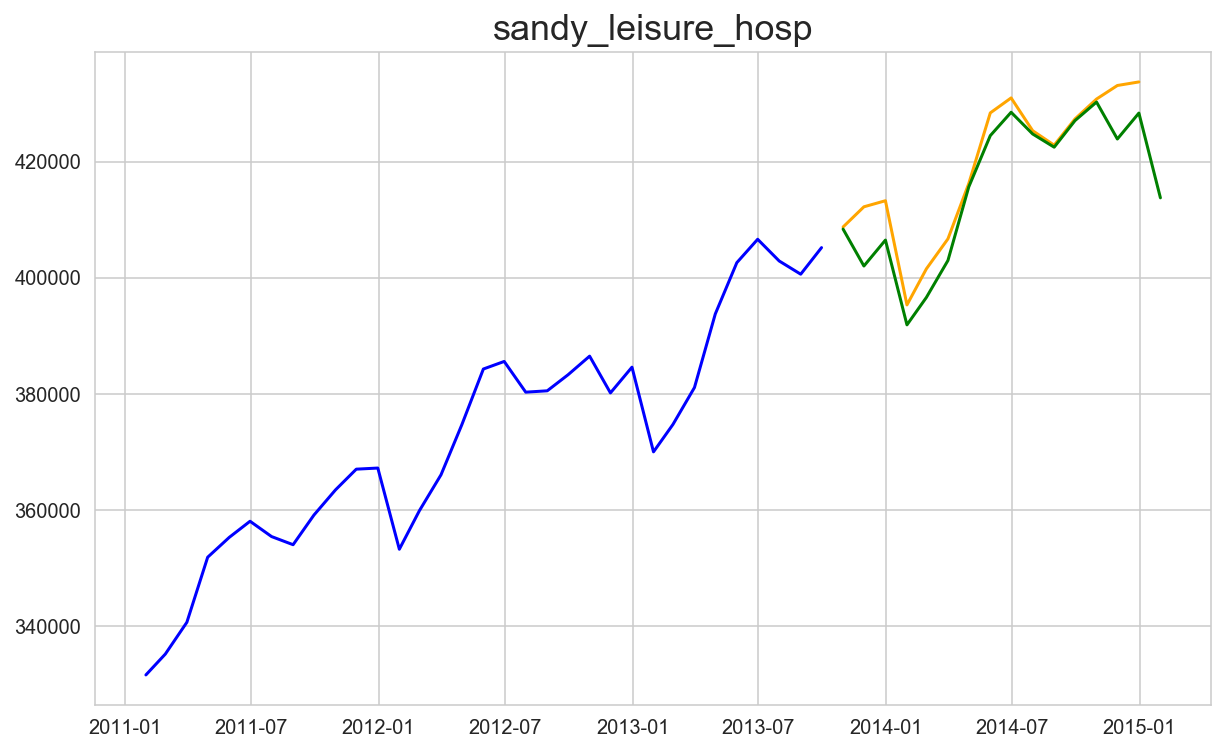

(            employment          preds      residual
 2011-01-31      331627            NaN           NaN
 2011-02-28      335224            NaN           NaN
 2011-03-31      340689            NaN           NaN
 2011-04-30      351898            NaN           NaN
 2011-05-31      355308            NaN           NaN
 2011-06-30      358089            NaN           NaN
 2011-07-31      355453            NaN           NaN
 2011-08-31      354051            NaN           NaN
 2011-09-30      359156            NaN           NaN
 2011-10-31      363482            NaN           NaN
 2011-11-30      367058            NaN           NaN
 2011-12-31      367249            NaN           NaN
 2012-01-31      353272            NaN           NaN
 2012-02-29      359932            NaN           NaN
 2012-03-31      366088            NaN           NaN
 2012-04-30      374714            NaN           NaN
 2012-05-31      384300            NaN           NaN
 2012-06-30      385605            NaN        

In [244]:
sarima_model(1,1,3,1,1,0, csv_file_path='./DisastersbyIndustry/Sandy-Industry/leisure_hospitality_all_employees.csv', period_of_disaster=33, industry_disaster_name='sandy_leisure_hosp')

## Manufacturing

In [245]:
sarima_search(csv_file_path='./DisastersbyIndustry/Sandy-Industry/manufacturing_all_employees.csv', period_of_disaster=33, industry_disaster_name='sandy_manufacturing')

C:\Users\aidan\Anaconda3\envs\DSI-6\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
C:\Users\aidan\Anaconda3\envs\DSI-6\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\aidan\Anaconda3\envs\DSI-6\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:937: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:]**2).mean()
C:\Users\aidan\Anaconda3\envs\DSI-6\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type

Our model that minimizes MSE on the training data is the SARIMA(0, 1, 3)x(2,0,0,12).
This model has an MSE of 222324672.226591.


(0, 1, 3, 2, 0, 0)

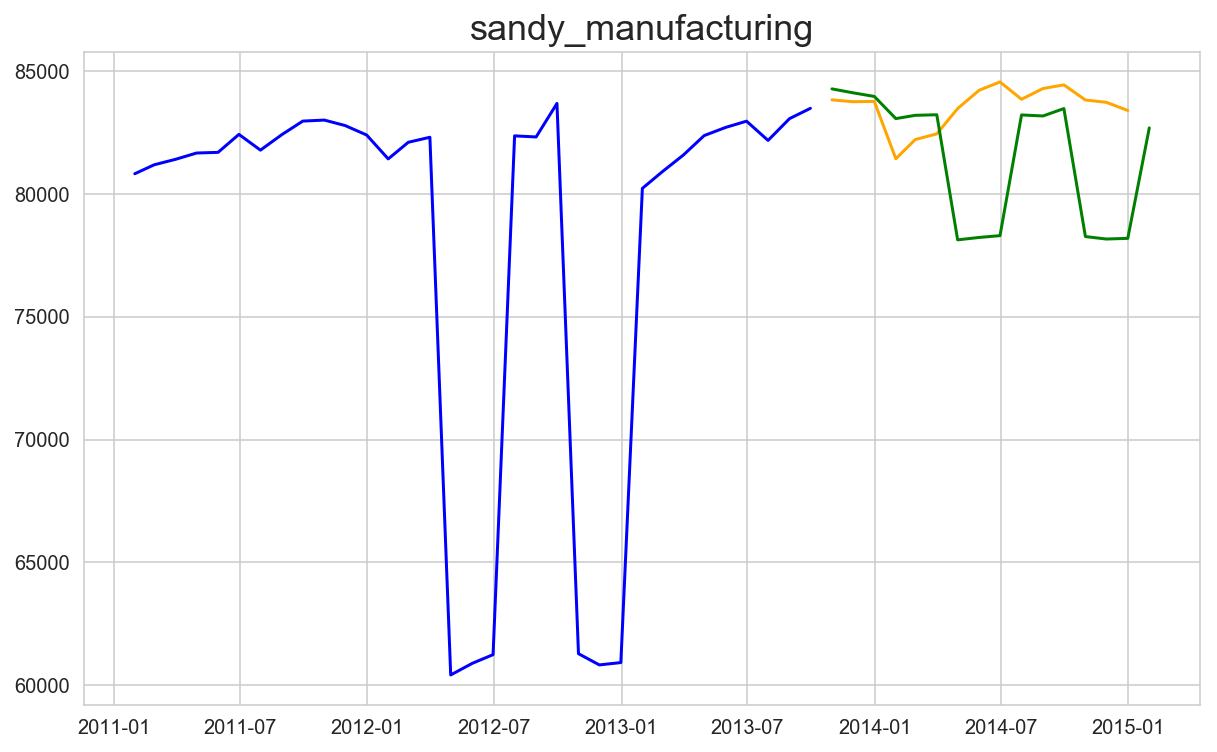

(            employment         preds     residual
 2011-01-31     80829.0           NaN          NaN
 2011-02-28     81194.0           NaN          NaN
 2011-03-31     81419.0           NaN          NaN
 2011-04-30     81673.0           NaN          NaN
 2011-05-31     81701.0           NaN          NaN
 2011-06-30     82433.0           NaN          NaN
 2011-07-31     81791.0           NaN          NaN
 2011-08-31     82426.0           NaN          NaN
 2011-09-30     82974.0           NaN          NaN
 2011-10-31     83015.0           NaN          NaN
 2011-11-30     82792.0           NaN          NaN
 2011-12-31     82406.0           NaN          NaN
 2012-01-31     81434.0           NaN          NaN
 2012-02-29     82112.0           NaN          NaN
 2012-03-31     82315.0           NaN          NaN
 2012-04-30     60416.0           NaN          NaN
 2012-05-31     60888.0           NaN          NaN
 2012-06-30     61243.0           NaN          NaN
 2012-07-31     82372.0        

In [246]:
sarima_model(0,1,3,2,0,0, csv_file_path='./DisastersbyIndustry/Sandy-Industry/manufacturing_all_employees.csv', period_of_disaster=33, industry_disaster_name='sandy_manufacturing')

## Natural Resources and Mining

In [247]:
sarima_search(csv_file_path='./DisastersbyIndustry/Sandy-Industry/natural_resources_mining_all_employees.csv', period_of_disaster=33, industry_disaster_name='natural_resources')

C:\Users\aidan\Anaconda3\envs\DSI-6\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
C:\Users\aidan\Anaconda3\envs\DSI-6\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:937: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:]**2).mean()
C:\Users\aidan\Anaconda3\envs\DSI-6\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\aidan\Anaconda3\envs\DSI-6\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Conve

Our model that minimizes MSE on the training data is the SARIMA(0, 1, 3)x(2,0,0,12).
This model has an MSE of 4004.9514126920335.


(0, 1, 3, 2, 0, 0)

C:\Users\aidan\Anaconda3\envs\DSI-6\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


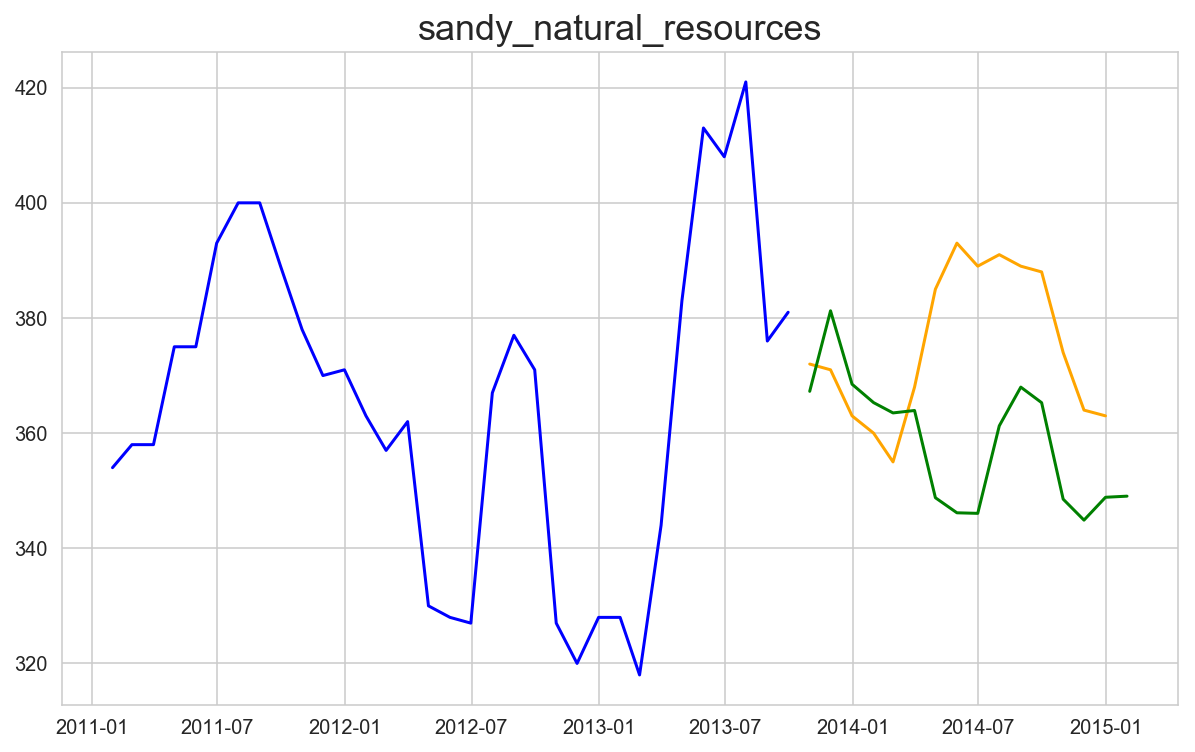

(            employment       preds   residual
 2011-01-31       354.0         NaN        NaN
 2011-02-28       358.0         NaN        NaN
 2011-03-31       358.0         NaN        NaN
 2011-04-30       375.0         NaN        NaN
 2011-05-31       375.0         NaN        NaN
 2011-06-30       393.0         NaN        NaN
 2011-07-31       400.0         NaN        NaN
 2011-08-31       400.0         NaN        NaN
 2011-09-30       389.0         NaN        NaN
 2011-10-31       378.0         NaN        NaN
 2011-11-30       370.0         NaN        NaN
 2011-12-31       371.0         NaN        NaN
 2012-01-31       363.0         NaN        NaN
 2012-02-29       357.0         NaN        NaN
 2012-03-31       362.0         NaN        NaN
 2012-04-30       330.0         NaN        NaN
 2012-05-31       328.0         NaN        NaN
 2012-06-30       327.0         NaN        NaN
 2012-07-31       367.0         NaN        NaN
 2012-08-31       377.0         NaN        NaN
 2012-09-30  

In [250]:
sarima_model(0,1,3,2,0,0, csv_file_path='./DisastersbyIndustry/Sandy-Industry/natural_resources_mining_all_employees.csv', period_of_disaster=33, industry_disaster_name='sandy_natural_resources')

## Other Services

In [252]:
sarima_search(csv_file_path='./DisastersbyIndustry/Sandy-Industry/other_services_all_employees.csv', period_of_disaster=33, industry_disaster_name='sandy_other_services')

C:\Users\aidan\Anaconda3\envs\DSI-6\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
C:\Users\aidan\Anaconda3\envs\DSI-6\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\aidan\Anaconda3\envs\DSI-6\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:937: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:]**2).mean()
C:\Users\aidan\Anaconda3\envs\DSI-6\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type

Our model that minimizes MSE on the training data is the SARIMA(0, 1, 3)x(2,0,0,12).
This model has an MSE of 662286655.5841049.


(0, 1, 3, 2, 0, 0)